In [34]:
import pandas as pd
import numpy as np
import pydotplus 
import io
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import misc
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
#from sklearn.model_selection import CridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline


url = 'https://raw.githubusercontent.com/firasm/PIMS-BCFSA/master/New_Sample_Clean_latest.csv'
#url ='https://raw.githubusercontent.com/shughestr/PIMS_2020_Real_Estate_data/master/sample_clean.csv'
  
df = pd.read_csv(url, error_bad_lines=False)
df=df.dropna()
# in this step, we removed 2 columns 
for col in df.columns:
    if len(df[col].unique())==1:
        df.drop(col,inplace=True,axis=1)


In [21]:
from itertools import product

def check_cardinality(df):

    combinations_lst = list(product(df.columns, df.columns))
    relations = ['one_to_one', 'one_to_many', 'many_to_one']

    output = []
    for col1, col2 in combinations_lst:
        for relation in relations:
            try:
                pd.merge(df[[col1]], df[[col2]], left_on=col1, right_on=col2, validate=relation)
                output.append([col1, col2, relation])
            except:
                continue

    return output



In [22]:
def get_relation(df, col1, col2):        
    first_max = df[[col1, col2]].groupby(col1).count().max()[0]
    second_max = df[[col1, col2]].groupby(col2).count().max()[0]
    if first_max==1:
        if second_max==1:
            return 'one-to-one'
        else:
            return 'one-to-many'
    else:
        if second_max==1:
            return 'many-to-one'
        else:
            return 'many-to-many'

from itertools import product
for col_i, col_j in product(df.columns, df.columns):
    if col_i == col_j:
        continue
    print(col_i, col_j, get_relation(df, col_i, col_j))

ADDRESS ASSESSED_VALUE many-to-many
ADDRESS COMM_CODE many-to-many
ADDRESS COMM_NAME many-to-many
ADDRESS LATITUDE many-to-many
ADDRESS LONGITUDE many-to-many
ADDRESS ROLL_NUMBER many-to-many
ADDRESS Year many-to-many
ADDRESS location many-to-many
ADDRESS fsa many-to-many
ADDRESS pct_change many-to-many
ADDRESS YEAR_OF_CONSTRUCTION many-to-many
ADDRESS saf1 many-to-many
ADDRESS saf2 many-to-many
ADDRESS saf3 many-to-many
ADDRESS saf4 many-to-many
ADDRESS saf5 many-to-many
ADDRESS saf6 many-to-many
ADDRESS saf7 many-to-many
ADDRESS saf8 many-to-many
ADDRESS mr5y many-to-many
ADDRESS Inflation many-to-many
ADDRESS pop1 many-to-many
ADDRESS pop2 many-to-many
ADDRESS pop3 many-to-many
ADDRESS pop4 many-to-many
ADDRESS pop5 many-to-many
ADDRESS pop6 many-to-many
ADDRESS lan1 many-to-many
ADDRESS lan2 many-to-many
ADDRESS inc1 many-to-many
ADDRESS inc2 many-to-many
ADDRESS inc3 many-to-many
ADDRESS inc4 many-to-many
ADDRESS own1 many-to-many
ADDRESS own2 many-to-many
ADDRESS own3 many-to-man

In [35]:
df['pct_change_bin']=pd.cut(df['pct_change'], bins=np.linspace(df['pct_change'].quantile(0.01), df['pct_change'].quantile(0.99), 11),labels=range(0,10))
df=df.dropna()

In [36]:
df['pct_change']

0       -0.019971
1        0.005822
2       -0.063676
3       -0.024730
4       -0.018703
           ...   
15994    0.001912
15995   -0.059160
15997    0.023034
15998    0.054348
15999   -0.046392
Name: pct_change, Length: 14764, dtype: float64

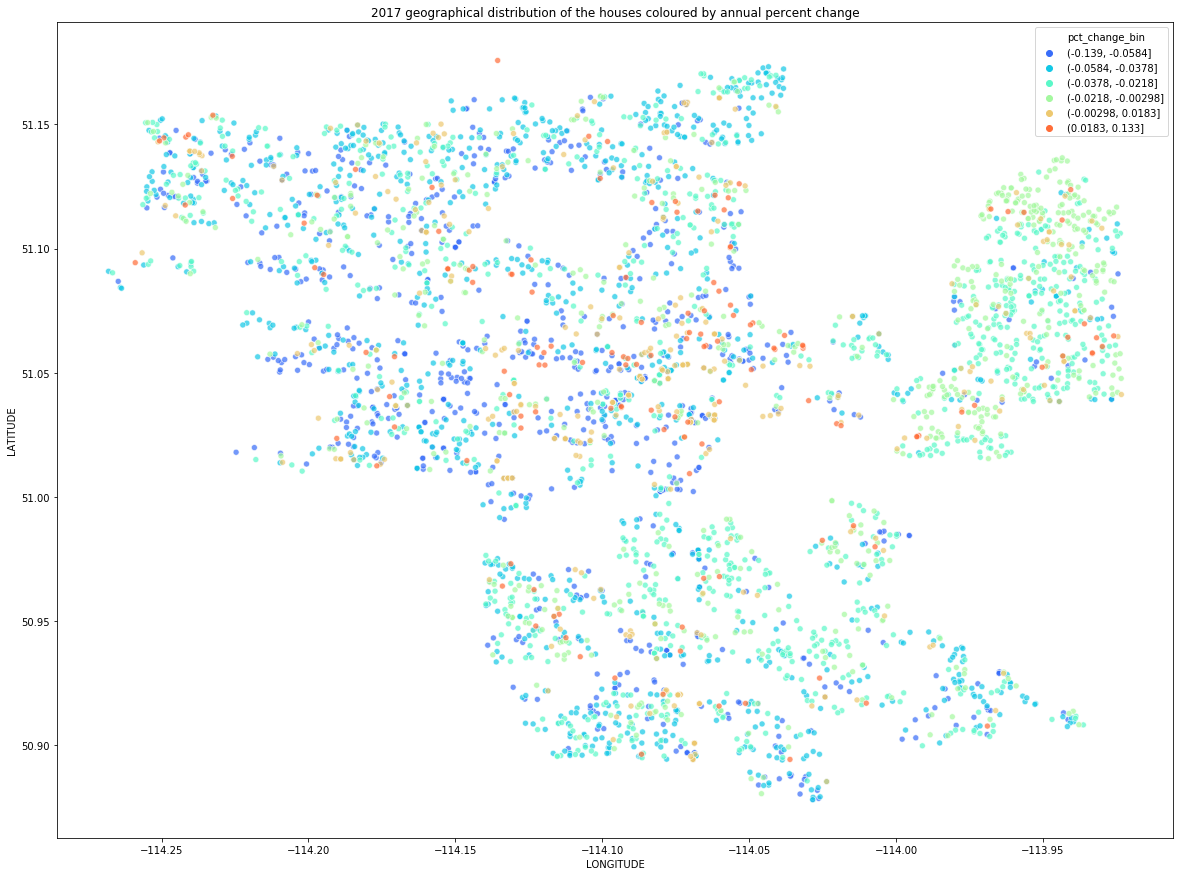

In [37]:
df['pct_change_bin'] = pd.qcut(df['pct_change'], q=6)

df=df.sort_values('pct_change_bin')

sns.set_palette("rainbow")

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2017 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2017], hue = 'pct_change_bin', ax=ax ,alpha=0.7)

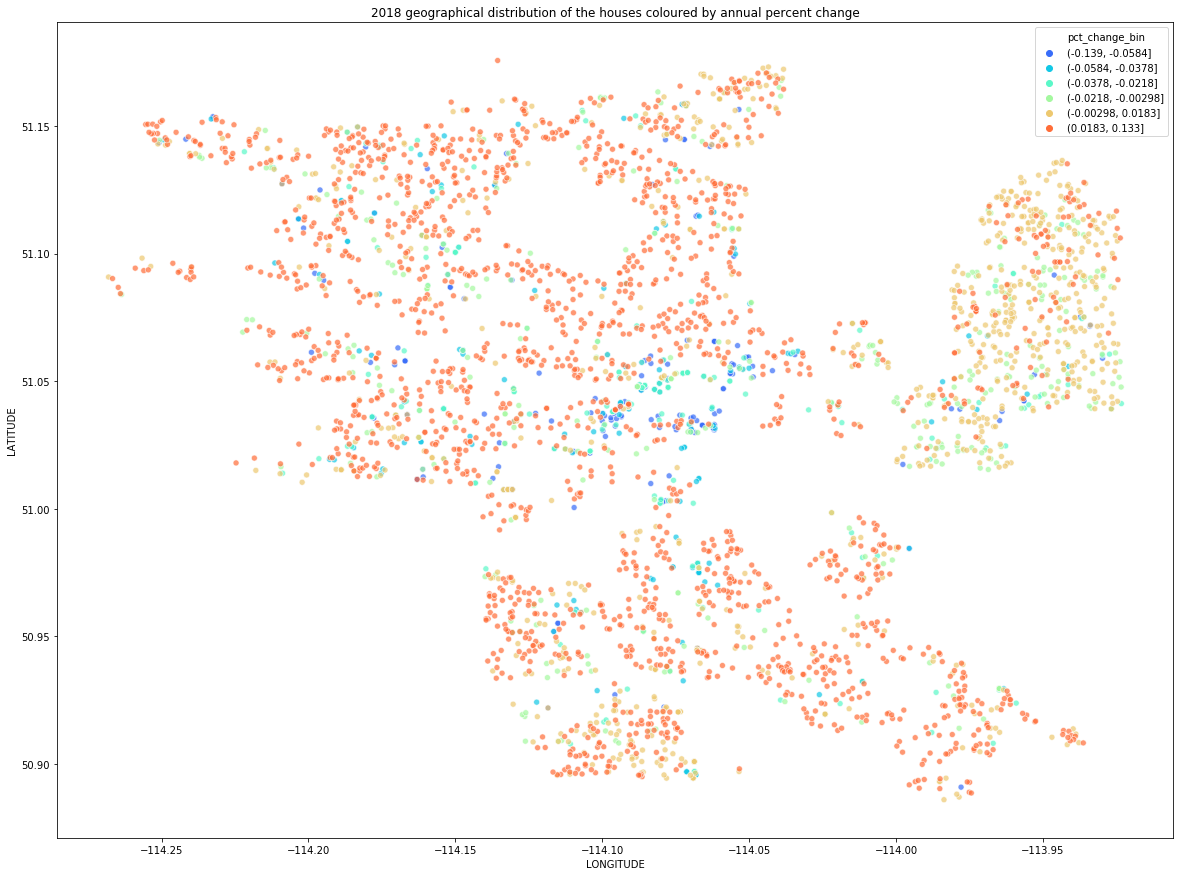

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2018 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2018], hue = 'pct_change_bin', ax=ax, alpha=0.7)

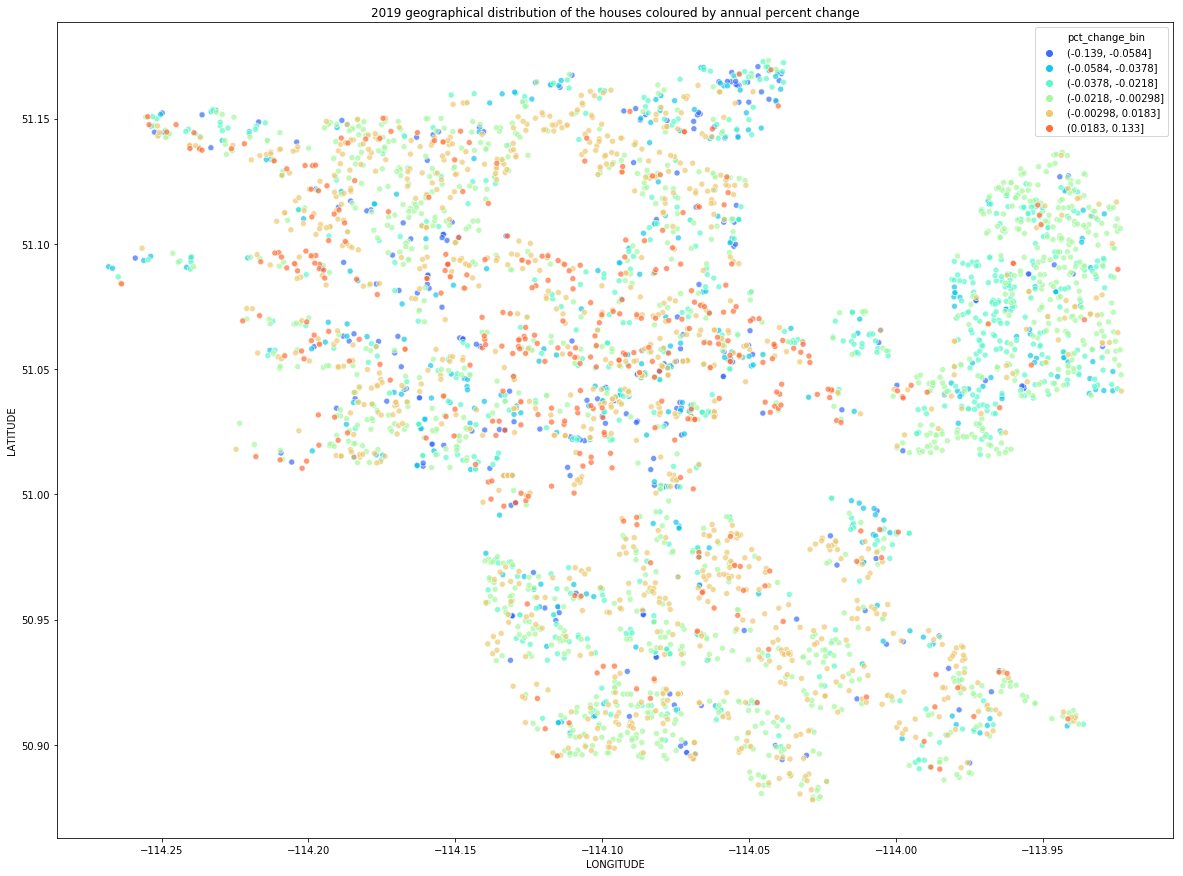

In [39]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2019 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2019], hue = 'pct_change_bin', ax=ax, alpha=0.7)

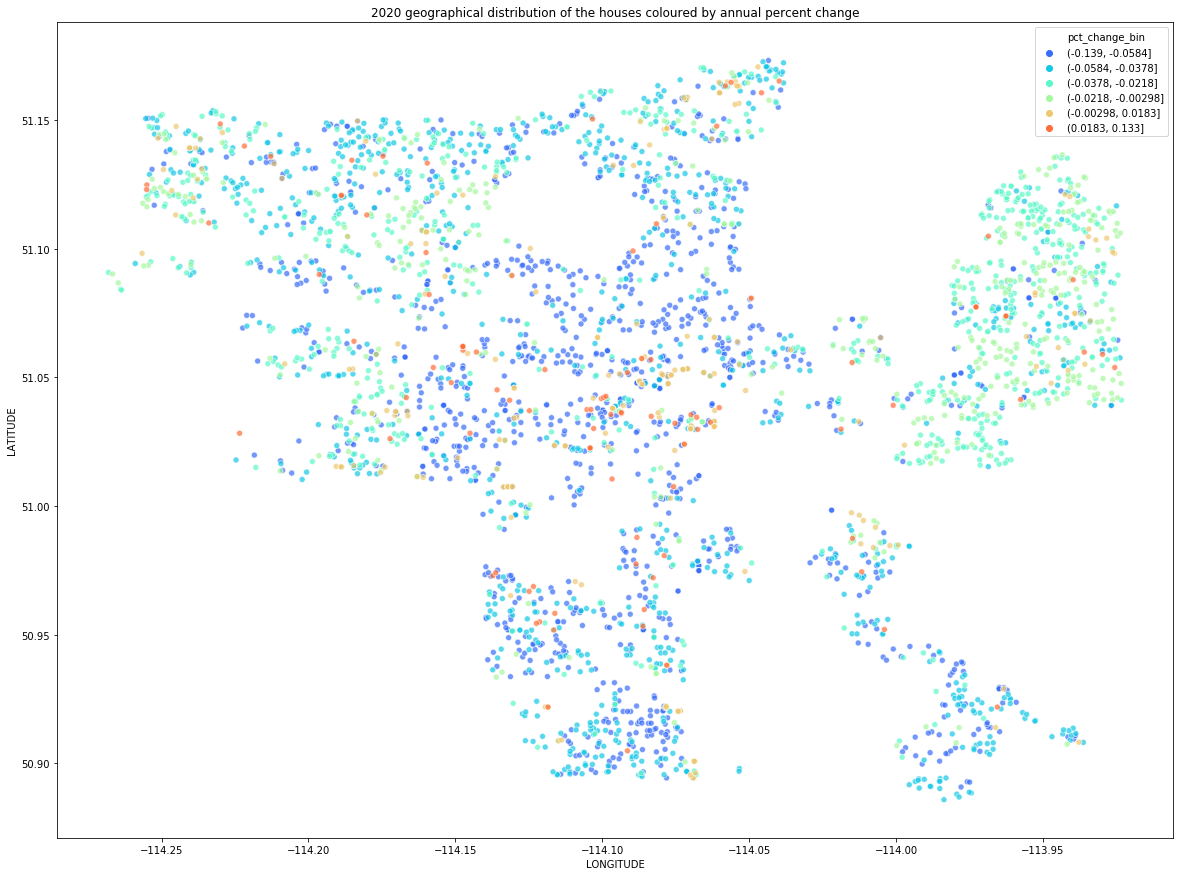

In [40]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('2020 geographical distribution of the houses coloured by annual percent change')
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, alpha=0.7)

Text(0.5, 0, 'Year')

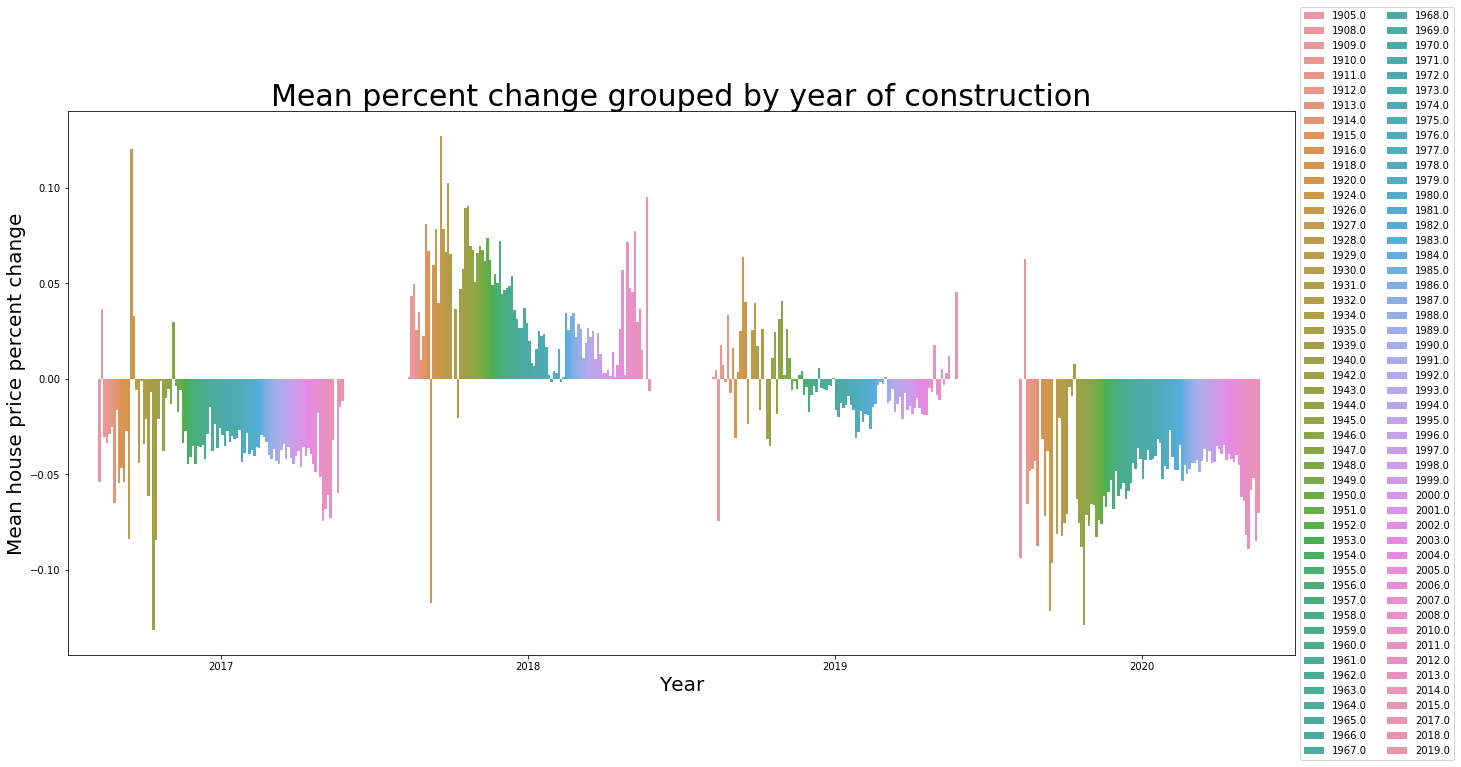

In [41]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title('Mean percent change grouped by year of construction', fontsize = 30)
sns.barplot(data = df, x = 'Year', y = 'pct_change', hue = 'YEAR_OF_CONSTRUCTION', estimator = np.mean, ci=None).legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=2)
ax.set_ylabel('Mean house price percent change', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

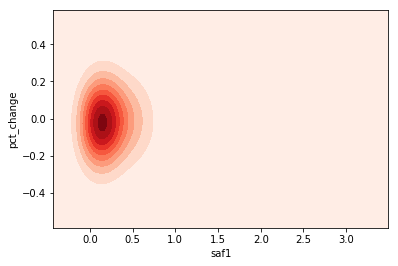

In [44]:
sns.kdeplot(df['saf1'], df['pct_change'], cmap="Reds", shade=True, bw=.15)
#sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, alpha=0.7)

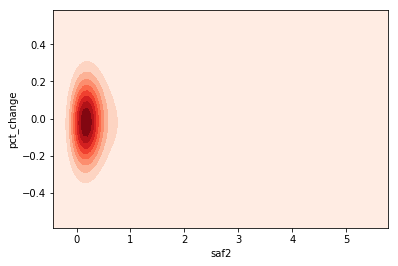

In [47]:
sns.kdeplot(df['saf2'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


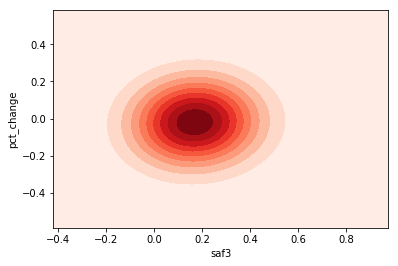

In [48]:
sns.kdeplot(df['saf3'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


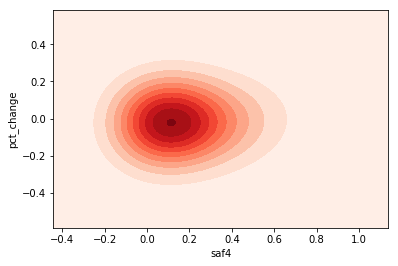

In [49]:
sns.kdeplot(df['saf4'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


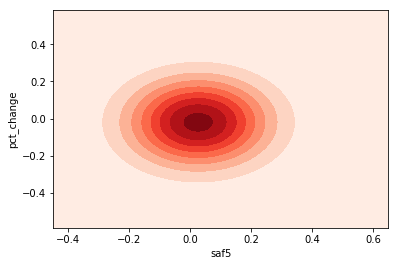

In [50]:
sns.kdeplot(df['saf5'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


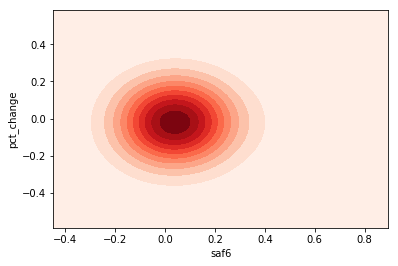

In [51]:
sns.kdeplot(df['saf6'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


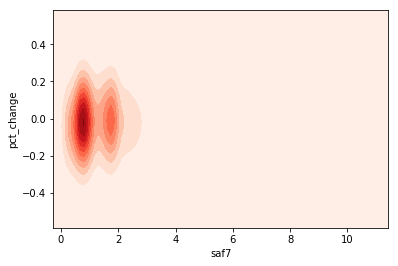

In [52]:
sns.kdeplot(df['saf7'], df['pct_change'], cmap="Reds", shade=True, bw=.15)


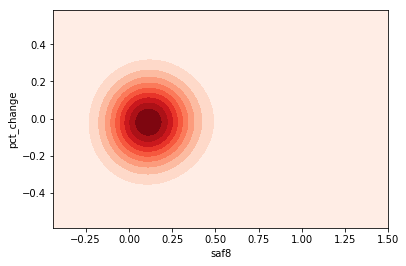

In [53]:
sns.kdeplot(df['saf8'], df['pct_change'], cmap="Reds", shade=True, bw=.15)

In [54]:
df.keys()

Index(['Unnamed: 0', 'ADDRESS', 'ASSESSED_VALUE', 'COMM_CODE', 'COMM_NAME',
       'LATITUDE', 'LONGITUDE', 'ROLL_NUMBER', 'Year', 'location', 'fsa',
       'pct_change', 'YEAR_OF_CONSTRUCTION', 'saf1', 'saf2', 'saf3', 'saf4',
       'saf5', 'saf6', 'saf7', 'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2',
       'pop3', 'pop4', 'pop5', 'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3',
       'inc4', 'own1', 'own2', 'own3', 'own4', 'lab1', 'lab2', 'lab3',
       'vacancy_rate', 'walk_score_comm', 'transit_score_comm',
       'bike_score_comm', 'comm_polulation', 'pct_change_bin'],
      dtype='object')

In [95]:
df_num = df.drop(['Unnamed: 0','ADDRESS','COMM_CODE','COMM_NAME','location','fsa'],axis=1)


In [91]:
from sklearn import preprocessing
x=df_num.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).values
#min_max_scaler=preprocessing.MinMaxScaler()
#x_scaled=min_max_scaler.fit_transform(x)


standard_scaler=preprocessing.StandardScaler()
x_scaled=standard_scaler.fit_transform(x)


df_scaled=pd.DataFrame(x_scaled,columns=df_num.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).columns)

df_scaled[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']]=df_num[['ASSESSED_VALUE','pct_change','Year','pct_change_bin']]

In [92]:
df_scaled.head()

,LATITUDE,LONGITUDE,ROLL_NUMBER,YEAR_OF_CONSTRUCTION,saf1,saf2,saf3,saf4,saf5,saf6,...,lab2,lab3,vacancy_rate,walk_score_comm,transit_score_comm,bike_score_comm,ASSESSED_VALUE,pct_change,Year,pct_change_bin
0,0.118800,-0.897473,-0.594439,-1.441633,-0.241678,-0.400280,-1.518565,-0.475536,-0.868129,-0.163679,...,-0.718761,-1.214388,-1.192695,-0.576045,-0.453063,0.431071,343500.0,-0.019971,2017.0,"(-0.0218, -0.00298]"
1,1.137523,-0.267509,0.095925,-0.173179,-0.459869,-0.448263,-0.004354,-0.813304,-0.650605,-0.473636,...,-0.915456,-0.658886,-0.161693,-0.636204,0.394460,-0.628893,345500.0,0.005822,2018.0,"(-0.00298, 0.0183]"
2,1.147381,-0.267490,0.095929,-0.118029,-0.553846,-0.522528,-1.310588,-0.974111,-0.793562,-0.629426,...,-0.915456,-0.658886,-0.161693,-0.636204,0.394460,-0.628893,323500.0,-0.063676,2019.0,"(-0.139, -0.0584]"
3,-0.138850,1.387708,-0.511986,-0.614380,0.183349,-0.030752,-0.438821,0.054248,-0.209822,0.040471,...,1.149841,0.930536,1.999931,1.710010,0.582798,-0.067735,315500.0,-0.024730,2020.0,"(-0.0378, -0.0218]"
4,0.486277,-1.118285,-0.723062,1.040124,-0.340273,-0.444274,-1.545591,-0.084606,-0.928741,-0.639364,...,0.264713,0.573474,1.297154,-0.154929,-0.641402,-0.067735,393500.0,-0.018703,2017.0,"(-0.0218, -0.00298]"


Text(0, 0.5, 'cumulative explained variance')

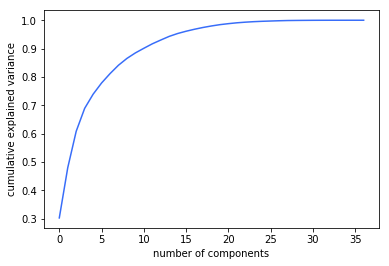

In [93]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled.drop(['ASSESSED_VALUE','pct_change','Year','pct_change_bin'],axis=1).values)
ratio=np.cumsum(pca.explained_variance_ratio_)
plt.plot(ratio)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')